In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"

In [ ]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/gdrive/MyDrive/kaggle. Or use the environment method.


In [ ]:
! unzip/*.zip && rm *.zip

/bin/bash: unzip/*.zip: No such file or directory


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('/content/gdrive/MyDrive/test.csv')
data = pd.read_csv('/content/gdrive/MyDrive/train.csv')

In [ ]:

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [ ]:
pylab.rcParams['figure.figsize'] = (10, 6)
iris_data = datasets.load_iris()
# We'll use the petal length and width only for this analysis
X = iris_data.data[:, [2, 3]]
y = iris_data.target
# Input the iris data into the pandas dataframe
iris_dataframe = pd.DataFrame(iris_data.data[:, [2, 3]],
                  columns=iris_data.feature_names[2:])
# View the first 5 rows of the data
print(iris_dataframe.head())
# Print the unique labels of the dataset
print('\n' + 'Unique Labels contained in this data are '
     + str(np.unique(y)))

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

Unique Labels contained in this data are [0 1 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('The training set contains {} samples and the test set contains {} samples'.format(X_train.shape[0], X_test.shape[0]))

The training set contains 105 samples and the test set contains 45 samples


In [ ]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)
print('The first five rows after standardisation look like this:\n')
print(pd.DataFrame(X_train_standard, columns=iris_dataframe.columns).head())

The first five rows after standardisation look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


In [ ]:
SVM = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
SVM.fit(X_train_standard, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
import warnings
def versiontuple(version):
   return tuple(map(int, (version.split("."))))
def decision_plot(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'green', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])
   # plot the decision surface
   x1min, x1max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2min, x2max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution),
                 np.arange(x2min, x2max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
              alpha=0.8, c=cmap(idx),
              marker=markers[idx], label=cl)

In [ ]:

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os


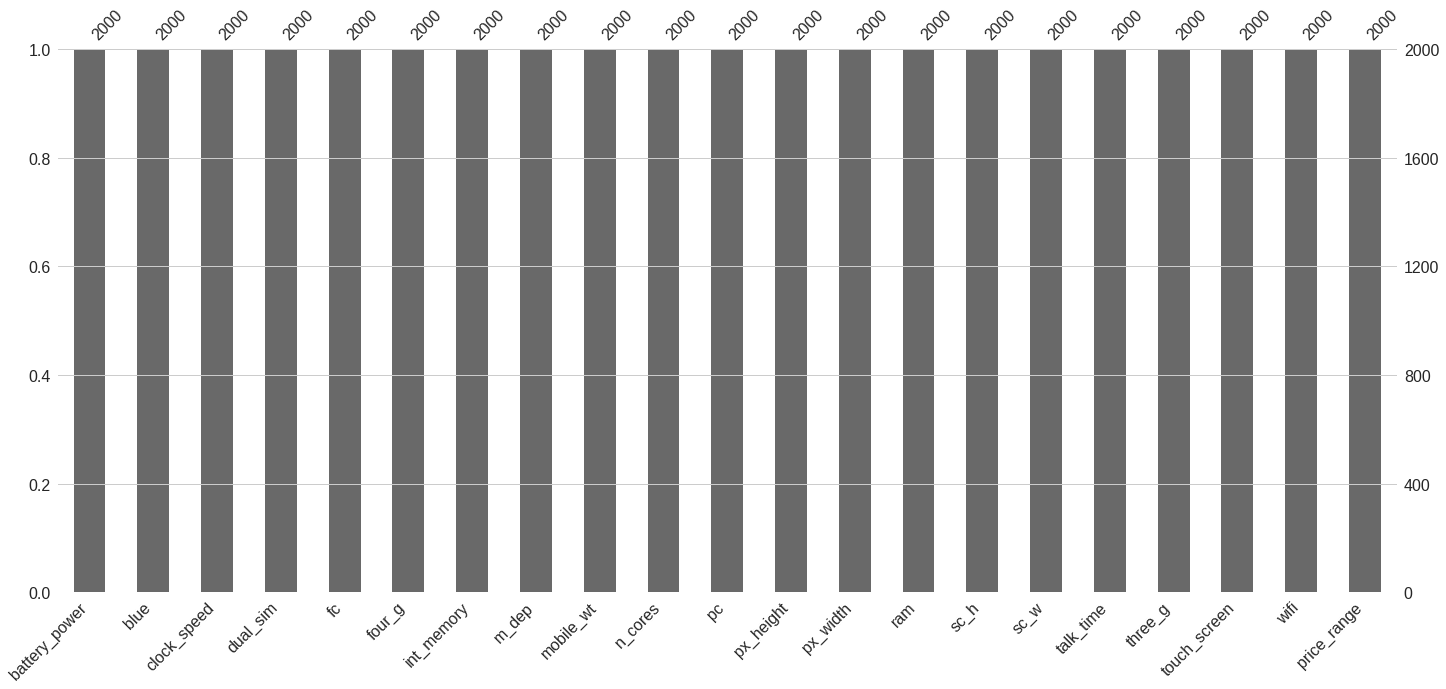

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data)
plt.show()

Text(0.5, 1.0, 'Correlation ')

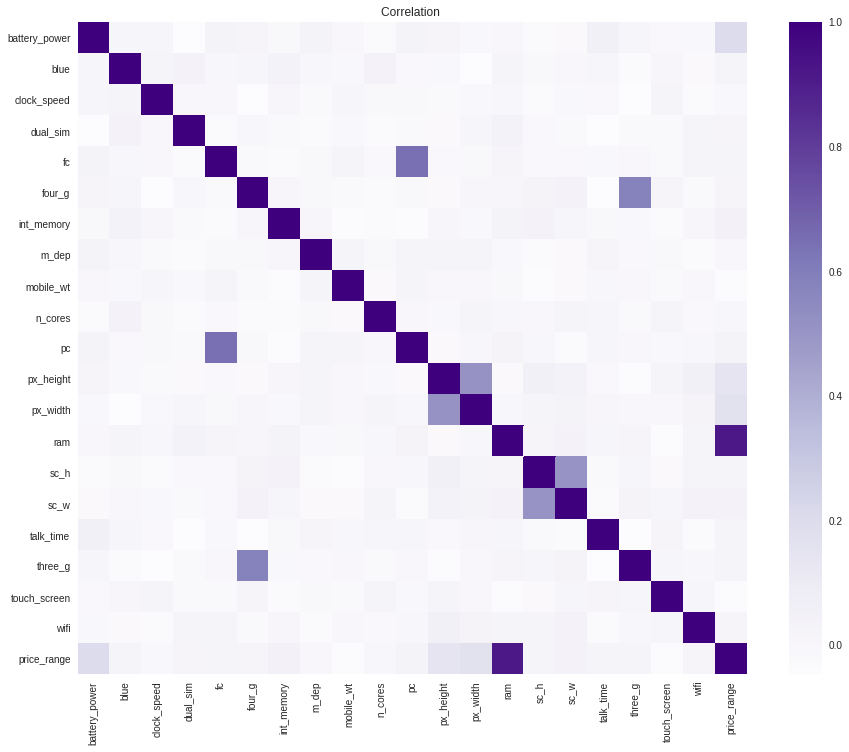

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

In [ ]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [ ]:
import csv
import json
import re
import numpy as np
import pandas as pd
import altair as alt

from collections import Counter, OrderedDict
from IPython.display import HTML


In [ ]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data.shape

(2000, 21)

In [ ]:
for cols in data.columns:
     if data[cols].dtype == 'int64' or data[cols].dtype == 'float64':
          data[cols] = ((data[cols] - data[cols].mean())/(data[cols].std())) 

In [ ]:
for cols in data.columns:
     if data[cols].dtype == 'int64' or data[cols].dtype == 'float64':
         upper_range = data[cols].mean() + 3 * data[cols].std()
         lower_range = data[cols].mean() - 3 * data[cols].std()

         index = data[(data[cols]> upper_range)|(data[cols]< lower_range)].index
         data = data.drop(index)

In [ ]:
data.shape

(1988, 21)

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902372,-0.989802,0.830572,-1.018929,-0.762304,-1.043705,-1.380298,0.340654,1.348911,-1.101696,-1.305424,-1.408596,-1.146497,0.391605,-0.784787,0.283032,1.462128,-1.786414,-1.005767,0.985850,-0.447102
1,-0.495015,1.009798,-1.252751,0.980932,-0.992642,0.957646,1.154735,0.687376,-0.120029,-0.664602,-0.645827,0.585631,1.704039,0.467200,1.113987,-0.635158,-0.734084,0.559501,0.993769,-1.013846,0.447102
2,-1.537302,1.009798,-1.252751,0.980932,-0.531966,0.957646,0.493422,1.380820,0.134210,0.209587,-0.645827,1.392336,1.074699,0.441387,-0.310094,-0.864705,-0.368048,0.559501,0.993769,-1.013846,0.447102
3,-1.418964,1.009798,1.198217,-1.018929,-0.992642,-1.043705,-1.214970,1.034098,-0.261274,0.646681,-0.151130,1.286428,1.236662,0.594421,0.876640,0.512579,-0.002013,0.559501,-1.005767,-1.013846,0.447102
4,1.325574,1.009798,-0.394912,-1.018929,2.001753,0.957646,0.658751,0.340654,0.021215,-1.101696,0.673365,1.268401,-0.091429,-0.657502,-1.022134,-0.864705,0.730057,0.559501,0.993769,-1.013846,-0.447102


In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Requirement already up-to-date: libarchive in /usr/local/lib/python3.7/dist-packages (0.4.7)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1,gamma=1)

In [ ]:
from plotly.tools import FigureFactory as ff
datahead=data.head(10)
datahead=datahead.rename(index=str, columns={"battery_power": "Battery Power", "blue": "Bluetooth","clock_speed":"Clock Speed","dual_sim":"Dual Sim","fc":"Front Camera MP",
                                   "four_g":"4G","int_memory":"Internal Memory(GB)","m_dep":"Mobile Depth(CM)","mobile_wt":"Weight","n_cores":"Number of cores","pc":"Primary Camera MP"
                                   ,"px_height":"Pixel R. Height","px_width":"Pixel R. Width","ram":"RAM(MB)","sc_h":"Screen Height(cm)","sc_w":"Screen Width",
                                   "talk_time":"Longest Battery Charge","three_g":"3G","touch_screen":"Touch Screen","wifi":"WIFI","price_range":"Price Range"})
colorscale = "Greens"
table = ff.create_table(datahead,colorscale=colorscale,height_constant=40)
table.layout.width=2500


In [ ]:
chart=alt.Chart(data).mark_bar().encode(
    alt.X('ram', bin=True),
    y='count(*):Q',
    color='price_range:N',
).facet(column='price_range:N')

In [ ]:
chart=alt.Chart(data).mark_bar().encode(
    alt.X('ram', bin=True),
    y='count(*):Q',
    color='battery power:N',
).facet(column='battery power:N')

In [ ]:
chart=alt.Chart(data).mark_circle(size=20).encode(
    x='ram',
    y='battery_power',
    color='price_range:N',
    tooltip=["price_range", "ram",'battery_power']
).interactive().properties(
    width=400, height=300
)

In [ ]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['ram'], empty='none')

line = alt.Chart(data).mark_line(interpolate='basis').encode(
    x='ram:Q',
    y='int_memory:Q',
    color='price_range:N'
)

selectors = alt.Chart(data).mark_point().encode(
    x='ram:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)


points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)


text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'int_memory:Q', alt.value(' '))
)


rules = alt.Chart(data).mark_rule(color='black').encode(
    x='ram:Q',
).transform_filter(
    nearest
)


alt.layer(
    line, selectors, points, rules, text
).properties(
    width=400, height=300
)

alt.LayerChart(...)

In [ ]:
brush = alt.selection(type='interval')
color_scale = alt.Scale(domain=['0', '1',"2","3"],
                        range=['black', 'green','red','purple'])
points = alt.Chart(title="Y True").mark_point(stroke='price_range',
    strokeWidth=4).encode(
 
    x='ram:Q',
    y='battery_power:Q',
    color=alt.condition(brush, 'y_true:N', alt.value('lightgray'),scale=color_scale)
).properties(
    selection=brush,
    width=800
)
points2=alt.Chart(title="Y Prediction").mark_point(stroke='price_range',
    strokeWidth=4).encode(
    x='ram:Q',
    y='battery_power:Q',
    color=alt.condition(brush, 'y_pred:N', alt.value('lightgray'))
).properties(
    selection=brush,
    width=800
)
# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
    y='y_true:N',
    color='y_true:N',
    x='count(y_true):Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
)
bar2 = alt.Chart().mark_bar().encode(
    y='y_pred:N',
    color='y_pred:N',
    x='count(y_pred):Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
)


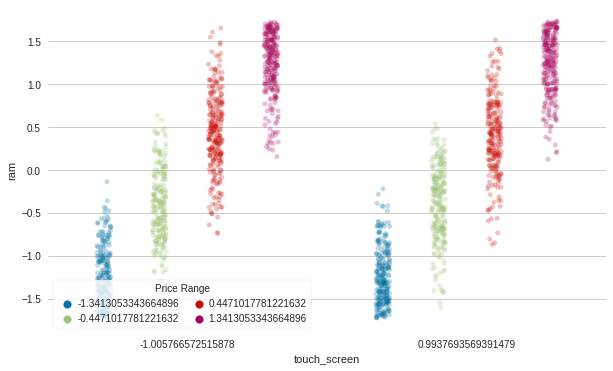

In [ ]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=data, dodge=True, jitter=True,
              alpha=.25, zorder=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend( title="Price Range",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=2, frameon=True)


In [ ]:
X = data.drop('price_range',axis=1)
y = data['price_range']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [ ]:
from sklearn.svm import SVC
model_svc = 'support vector classifier'
svc = SVC(C=2, kernel='rbf')




In [ ]:
import numpy
from scipy import optimize

class SVM2C(object):
    def __init__(self,xdata,ydata,c=9000,learning_rate=0.001,
            n_iter=600,method='GD'):

        self.values=numpy.unique(ydata)
        # Add 1 dimension for bias
        self.xdata=numpy.hstack([xdata,numpy.ones([xdata.shape[0],1])])
        self.ydata=numpy.where(ydata==self.values[-1],1,-1)
        self.c=c
        self.lr=learning_rate
        self.n_iter=n_iter
        self.method=method

        self.m=len(xdata)
        self.theta=numpy.random.random(self.xdata.shape[1])-0.5

    def costFunc(self,theta,x,y):
        zs=numpy.dot(x,theta)
        j=numpy.maximum(0.,1.-y*zs).mean()*self.c+0.5*numpy.sum(theta[:-1]**2)
        return j

    def jac(self,theta,x,y):
        '''Derivative of cost function'''
        zs=numpy.dot(x,theta)
        ee=numpy.where(y*zs>=1.,0.,-y)[:,None]
        dj=numpy.zeros(self.theta.shape)
        dj[:-1]=(ee*x[:,:-1]).mean(axis=0)*self.c+theta[:-1] # weights
        dj[-1]=(ee*self.c).mean(axis=0)                      # bias

        return dj

    def train(self):

        #----------Optimize using scipy.optimize----------
        if self.method=='optimize':
            opt=optimize.minimize(self.costFunc,self.theta,args=(self.xdata,self.ydata),\
                    jac=self.jac,method='Nelder-Mead')
            self.theta=opt.x

        #---------Optimize using Gradient descent---------
        elif self.method=='GD':

            costs=[]
            lr=self.lr
            # ADAM parameteres
            beta1=0.9
            beta2=0.999
            epsilon=1e-8

            mt_1=0
            vt_1=0
            for ii in range(self.n_iter):
                t=ii+1
                dj=self.jac(self.theta,self.xdata,self.ydata)
                '''
                mt=beta1*mt_1+(1-beta1)*dj
                vt=beta2*vt_1+(1-beta2)*dj**2
                mt=mt/(1-beta1**t)
                vt=vt/(1-beta2**t)
                self.theta=self.theta-lr*mt/(numpy.sqrt(vt)+epsilon)
                mt_1=mt
                vt_1=vt

                cii=self.costFunc(self.theta,self.xdata,self.ydata)
                '''
               

In [ ]:
 from sklearn.datasets.samples_generator import make_blobs 

In [ ]:
y = data["price_range"].values
x_data=data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [ ]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
ClassBalance(y_train, y_test)
visualizer.poof()

In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
SVC(x_train,y_train)


SVC(C=      battery_power  blue  clock_speed  ...  three_g  touch_screen  wifi
409        0.818303   1.0         0.16  ...      1.0           0.0   1.0
30         0.720107   1.0         0.00  ...      0.0           0.0   1.0
1150       0.251169   0.0         0.32  ...      1.0           0.0   0.0
1949       0.171009   1.0         0.16  ...      1.0           1.0   0.0
424        0.142953   0.0         0.72  ...      0.0           0.0   0.0
...             ...   ...          ...  ...      ...           ...   ...
1800       0.572478   0.0         0.48  ...      1.0           0.0   0.0
1099       0.798931   0.0         0.00  ...      1.0           1.0   0.0
1944       0.028724   1.0         0.00  ...      1.0           1.0   0.0
237        0.812959   1.0         0.80  ...      1.0           1.0   1.0
1064       0.915832   0.0         0.00  ...      1.0           0.0   1.0

[1590 rows x 20 columns],
    break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_s

No handles with labels found to put in legend.


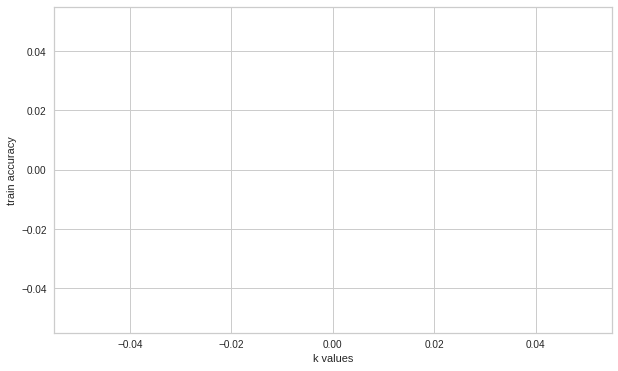

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
 SVC(x_train, y_train)
accuracy_list_train.append(SVC)   
    
plt.plot(color="green",label="train")

plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

In [ ]:
df = {'best features number': k, 'train_score': accuracy_list_train}


In [ ]:
selector = SelectKBest(f_classif, k = 5)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'px_height' 'px_width' 'ram' 'sc_h']
x test features: ['battery_power' 'px_height' 'px_width' 'ram' 'sc_h']


In [ ]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [ ]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))

No handles with labels found to put in legend.


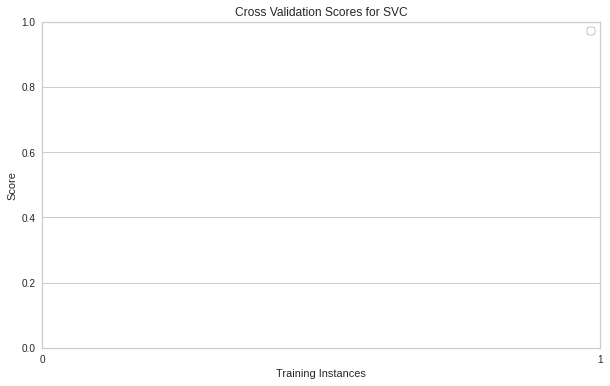

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

cv = StratifiedKFold(10)

oz = CVScores(
    SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1), ax=ax, cv=cv, scoring='accuracy'
)
oz.poof()

In [ ]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm_model, classes=[0,1,2,3]
)

cm.poof()

In [ ]:
svm_test=x_test[["battery_power","int_memory","px_height","px_width","ram"]]

In [ ]:
svm_test.head()

,battery_power,int_memory,px_height,px_width,ram
1556,0.249833,0.661290,0.460204,0.313084,0.839123
1552,0.708751,0.854839,0.526531,0.851802,0.491716
1182,0.138945,0.177419,0.290816,0.615487,0.056387
112,0.244489,0.032258,0.035714,0.983979,0.142704
564,0.048764,0.580645,0.145918,0.447931,0.805184


In [ ]:
df['square']=df['px_width']*df['px_height']